In [1]:
import matplotlib.pyplot as plt
import numpy as np 
from math import sqrt 
from math import floor
from math import ceil
from math import exp 
import pickle
from operator import itemgetter
import time
from datetime import timedelta
import matplotlib
from matplotlib import cm, colors
from numpy import amin, amax, ravel

In [2]:
def filter_conformations(saws ): 
    """Функция получает на вход список блужданий на плоскости, в котором каждое блуждание представлено списком из координат - кортежом.
    Осуществляет перебор списка. Вызывает функцию distance_between_saws.
    Возвращает список блужданий без повторения конформаций."""
    result = []
    result.append(saws[0])
    #result = [saws[0]]
    for i in range (1, len(saws)):
        if(i%100==0):
            print(i, end= " ")
        k=0
        for conformation in result:
            if(  distance_between_saws(conformation, saws[i] )== 0):
                k=-1
                break;
        if(k==-1):
            continue
        else:
            #if(saws[i])
            result.append(saws[i])
    return result 

In [3]:
def vector_for_distance(saw):
    """Принимает на вход конформацию(блуждание) на плоскости - список координат(кортежей).
    Возвращает вектор, описывающий данную конформацию, согласно [1]"""
    result = []
    left = [[(0,1), (-1, 0)] , [(1, 0), (0, 1)], [(0, -1), (1, 0)], [(-1, 0), (0, -1)] ]
    right = [ [(1, 0), (0, -1)], [(0,1), (1, 0)],  [(-1, 0), (0, 1)],  [(0, -1), (-1, 0)]  ]
    for i in range(2, len(saw)):
        steps = []
        dx = saw[i-1][0] - saw[i-2][0]
        dy =  saw[i-1][1] - saw[i-2][1]
        steps.append((dx, dy))
        dx = saw[i][0] - saw[i-1][0]
        dy =  saw[i][1] - saw[i-1][1]
        steps.append((dx, dy))
        if(saw[i][0] == saw[i-1][0] and saw[i-1][0]==saw[i-2][0] or saw[i][1] == saw[i-1][1] and saw[i-1][1]==saw[i-2][1]):
            result.append(0)
        elif (steps in left):
            result.append(-1)
        else:
            result.append(1)
    return result 

In [4]:
def distance_between_saws(saw1, saw2):
    """Принимает на вход два блуждания(конформации) на плоскости и возвращает целое число - расстояние между ними согласно метрике, описанной в [1].
    Вызывает функцию vector_for_distance для каждого переданного блуждания"""
    v1 = 0
    v2 = 0
    v_minus = []
    v_plus = [] 
    s1 =  vector_for_distance(saw1)
    s2= vector_for_distance(saw2)
    for i in range(len(s1)):
        v1=v1+ abs( s1[i]-s2[i])
        v2=v2+ abs( s1[i]+s2[i])
    #print(saw1, " ", s1)
    #print(saw2, " ", s2)
    #print(min(v1, v2))
    return min(v1, v2)

In [5]:
steps = [(1, 0), (-1, 0), (0, 1),  (0, -1)]
def get_all_conformations(length):
    """Создает список конформаций на плоскости.  Функция принимает один аргумент - длину (число остатков).
    Возвращает список блужданий, в котором каждое блуждание представлено списком из координат
    Данный вариант работает для длин равных или больше 3."""
    #if(length==3):
        #return [[(0, 0), (1, 0), (2, 0)], [(0, 0), (1, 0), (1, 1)]]
    if(length==2):
        return [[(0, 0), (1, 0)], ]
    else:
        result = get_all_conformations(length-1)
        new_conformations = [] 
        for i in range(len(result)):
            #print(i, end = "\n")
            for step in steps:
                new_point = (result[i][-1][0]+step[0], result[i][-1][1]+step[1] )
                if new_point in result[i]:
                    #print("the same ", new_point)
                    continue
                temp = result[i].copy()
                temp.append(new_point)
                new_conformations.append(temp)
        #print(length, " new  result is  ", new_conformations )
    filtered = filter_conformations(new_conformations)
    #print("after filter ", filtered)
    return filtered

In [6]:
start_time = time.monotonic()

conformations_10= get_all_conformations(10)

end_time = time.monotonic()
print(timedelta(seconds=end_time - start_time))
#print(conformations_10)
print(len(conformations_10))


#print(saws_set)

#for i in range(len(saws_set)):
#    for j in conformations_10:
#        if j==saws_set[i]:
#            print(i)


#3 0 and 1
#

100 200 100 200 300 400 500 600 700 100 200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 0:00:45.516524
2034


Для длины 10 получается 2034 конформации. Точно такой же результат описан в [1]

In [7]:
with open('out_10.pickle', 'wb') as f:
    pickle.dump(conformations_10, f)

In [49]:
number_of_conformations=[]
for i in range(3, 11):
    c = get_all_conformations(i)
    number_of_conformations.append(len(c))
    print(i, " finished", end = " ")

3  finished 4  finished 5  finished 6  finished 7  finished 100 200 8  finished 100 200 100 200 300 400 500 600 700 9  finished 100 200 100 200 300 400 500 600 700 100 200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 10  finished 

In [52]:
approximate = []
two =[]
for i in range(3, 11):
    approximate.append(2.718**(i-1))
    two.append(2**i)

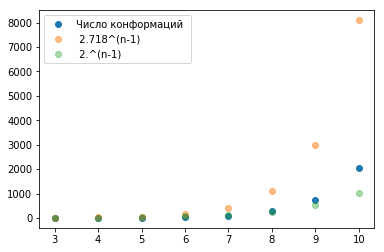

In [53]:
plt.plot(range(3, 11), number_of_conformations, 'o', label = "Число конформаций ")
plt.plot(range(3, 11), approximate, 'o', label = " 2.718^(n-1) ", alpha = 0.5)
plt.plot(range(3, 11), two, 'o', label = " 2.^(n-1) ", alpha=0.4)
plt.legend(loc='best')

Число конформаций (блужданий без самопересечений) растет экспоненциально. Это также показывается во второй главе [2]

In [7]:
def end_to_end_distance(path):
    """Евклидова метрика"""
    distance = sqrt((path[-1][0]-path[0][0])**2+(path[-1][1]-path[0][1])**2)     
    return distance 

In [8]:
def square_end_to_end_distance(path):
    """Квадрат расстояния """
    distance = (path[-1][0]-path[0][0])**2+(path[-1][1]-path[0][1])**2 
    return distance 

In [9]:
def end_to_end_vector(vector1, vector2):
    "Просто вектор, сосединяющий начало и конец "
    return( vector2[0]-vector1[0], vector2[1]-vector1[1])

In [10]:
steps = [(1, 0), (-1, 0), (0, 1),  (0, -1)]
def calculate_contacts(saw):
    """Функция принимает на вход конформацию на плоскости(список координат). 
    Возвращает число топологических соседей для нее """
    k=0
    for i in range(1, len(saw)-1):
        not_topological=[saw[i-1], saw[i+1]]
        for step in steps:
            new_point = (saw[i][0]+step[0], saw[i][1]+step[1] )
            if (new_point in saw and (new_point not in not_topological)):
                k=k+1
    for step in steps:
        new_point_begin = (saw[0][0]+step[0], saw[0][1]+step[1] )
        new_point_end= ( saw[-1][0]+step[0], saw[-1][1]+step[1])
        if(new_point_begin in saw and new_point_begin!=saw[1]):
            k=k+1
 
        if( new_point_end in saw and new_point_end!=saw[-2]    ):
            k=k+1
        
        
    return k//2
        

In [11]:
e=22
conformations_10[e]

[(0, 0),
 (1, 0),
 (2, 0),
 (3, 0),
 (4, 0),
 (5, 0),
 (5, 1),
 (4, 1),
 (3, 1),
 (3, 2)]

In [12]:
calculate_contacts(conformations_10[e])

2

In [11]:
def count_saws_contact(saws):
    """Функция принимает список блужданий на плоскости. Возвращает словарь, в котором ключ - число топологических соседей,
    а значение - число таких конформаций.
    Максимальное число топологических соседей находится по формуле из [1]"""
    n=len(saws[0])
    m_1 = ceil(sqrt(n))
    m = floor(sqrt(n))
    if( n>m*m and m*m_1>=n ):
        t_max =n+1 - (4*m+2)/2
    elif (n>m*m_1 and n<=m_1*m_1):
        t_max = n+1 - (4*m+4)/2
    else:
        t_max =  n+1 - (4*m)/2
    
    t_max=int(t_max)
    print(t_max)
    counts ={}
    for i in range(t_max+1):
        counts.update({i :0})
    for saw in saws:
        e=calculate_contacts(saw)
        counts[e]=counts[e]+1
    return counts

In [17]:
d = count_saws_contact(conformations_10)
print(d)

4
{0: 666, 1: 672, 2: 425, 3: 173, 4: 98}


666 + 672 + 425 + 173 + 98 = 2034

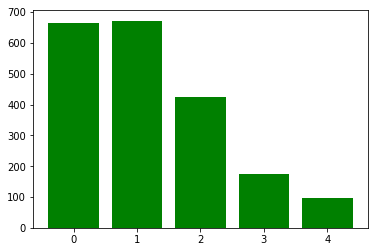

In [17]:
plt.bar(list(d.keys()), d.values(), color='g')
plt.show()

Гистограмма показывает, сколько существует различных конформаций для данного числа топологических соседей. 
Я сравнила эту гистаграмма с гистограммой из статьи (там она показана для последовательности из H), все нормально 

In [12]:
def get_sequences(length):
    """Получаем все последовательности заданной длины, состоящие из 0 и 1.
    1 - это H
    0 - это Р"""
    if(length ==1):
        return [[0], [1]]
    else:
        previous = get_sequences(length - 1)
        result = [] 
        for i in range(len(previous)):
            current = previous[i].copy()
            current.append(0)
            result.append(current.copy())
            current[-1] = 1
            result.append(current)
            #print(result) 
        return sorted(result)


In [13]:
class Protein(object):
    def __init__(self, sequence, conformation):
        self.sequence = sequence
        self.conformation = conformation
        
    def count_proteins_contacts(self):
        """Для данного белка считает число топологических контактов HH и контакты HP/PP.
        Возвращает кортеж из двух элементов: первый элемент - число контактов НН, второй элемент - остальные контакты."""
        hh=0
        hp_pp = 0
        steps = [(1, 0), (-1, 0), (0, 1),  (0, -1)]
        for i in range(1, len(self.conformation)-1):
            not_topological=[self.conformation [i-1], self.conformation[i+1]]
            for step in steps:
                new_point = (self.conformation[i][0]+step[0], self.conformation [i][1]+step[1] )
                if (new_point in self.conformation  and (new_point not in not_topological)):
                    position = self.conformation.index(new_point)
                    if( self.sequence[position]==1 and self.sequence[i]==1 ):
                        hh=hh+1
                    else:
                        hp_pp=hp_pp + 1 
        for step in steps:
            new_point_begin = (self.conformation[0][0]+step[0], self.conformation[0][1]+step[1] )
            new_point_end= ( self.conformation[-1][0]+step[0], self.conformation [-1][1]+step[1])
            if(new_point_begin in self.conformation  and new_point_begin!=self.conformation [1]):
                position = self.conformation.index(new_point_begin)
                if( self.sequence[position]==1 and self.sequence[0]==1 ):
                    hh=hh+1
                else:
                    hp_pp=hp_pp + 1 
            if( new_point_end in self.conformation  and new_point_end!=self.conformation[-2]):
                position = self.conformation.index(new_point_end) 
                if( self.sequence[position]==1 and self.sequence[-1]==1 ):
                    hh=hh+1
                else:
                    hp_pp=hp_pp + 1 
        return (hh//2, hp_pp//2)
    
    


In [23]:
#Пример класса Protein 
p = Protein(sequences_10[500], conformations_10[347])
print(p.sequence, p.conformation)
c = p.count_proteins_contacts()
print(c)

[0, 1, 1, 1, 1, 1, 0, 1, 0, 0] [(0, 0), (1, 0), (2, 0), (2, 1), (3, 1), (3, 2), (4, 2), (4, 1), (4, 0), (3, 0)]
(1, 2)


In [14]:
def get_g_m(sequence, conformations=[]):
    """Функция, которая для данной цепочки создает словарь со следующим смыслом:
    ключ - число топологических соседей НН,
    значение - число конформаций с таким количеством топологических соседей НН для данной цепочки. 
    Функция принимает готовый список конформаций, иначе сгенерирует его сама """ 
    n=len(sequence)
    m_1 = ceil(sqrt(n))
    m = floor(sqrt(n))
    if( n>m*m and m*m_1>=n ):
        t_max =n+1 - (4*m+2)/2
    elif (n>m*m_1 and n<=m_1*m_1):
        t_max = n+1 - (4*m+4)/2
    else:
        t_max =  n+1 - (4*m)/2
    
    t_max=int(t_max) 
    counts ={}
    #for i in range(t_max+1):
        #counts.update({i :0})
    if(len(conformations)==0):
        conformations = get_all_conformations(len(sequence))
    for c in conformations:
        p = Protein(sequence, c)
        numbers =  p.count_proteins_contacts();
        if( numbers[0] in counts): 
            counts[numbers[0]] = counts[numbers[0]] +1
        else:
            counts.update({numbers[0] :1})
    
    
    
    return counts 
    
    
    

In [15]:
def get_G_m_u(sequence, conformations=[]):
    """Функция, которая для данной цепочки создает словарь со следующим смыслом:
    ключ - кортеж из двух элементов: 1)число топологических соседей НН 2)Число остальных топологических соседей ,
    значение - конформаций с такими количествами топологических соседей. 
    Функция принимает готовый список конформаций, иначе сгенерирует его сама """ 
    n=len(sequence)
    m_1 = ceil(sqrt(n))
    m = floor(sqrt(n))
    if( n>m*m and m*m_1>=n ):
        t_max =n+1 - (4*m+2)/2
    elif (n>m*m_1 and n<=m_1*m_1):
        t_max = n+1 - (4*m+4)/2
    else:
        t_max =  n+1 - (4*m)/2
    
    t_max=int(t_max) 
    if(len(conformations)==0):
        conformations = get_all_conformations(len(sequence))
    counts ={}
    #for i in range(t_max+1):
        #for j in range(t_max+1):
            #counts.update({ (i, j) :0})
    for c in conformations:
        p = Protein(sequence, c)
        numbers =  p.count_proteins_contacts();
        if( numbers in counts): 
            counts[numbers] = counts[numbers] +1
        else:
            counts.update({numbers :1})
    
        
    return counts 

In [234]:
z = get_g_m([1, 1, 1, 1, 1, 1, 1,1,1,1] )
print(z)

100 200 100 200 300 400 500 600 700 100 200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 {0: 666, 1: 672, 2: 425, 3: 173, 4: 98}


Это точно правильный результат согласно [1]


In [28]:
example_of_sequence = [1, 0, 1, 0, 0, 1, 0,0,1,1]  
new_example = get_g_m(example_of_sequence, conformations_10)
print("finished")
print(new_example )

finished
{0: 1435, 1: 513, 2: 75, 3: 10, 4: 1}


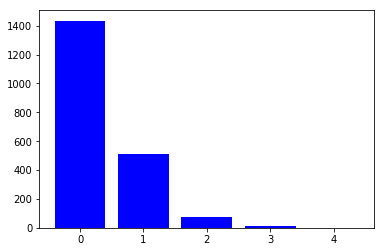

In [29]:
plt.bar(list(new_example.keys()), new_example.values(), color='b')
plt.show()

Это диаграмма функции g(m) для последовательности НРНРРНРРНН. 
х -число топологических контактов НН, у - число таких конформаций.


In [192]:
example_of_sequence = [0, 0, 0, 0, 0, 1, 1,1,1,1] 
new_example = get_g_m(example_of_sequence, conformations_10)
print(new_example)
print("finished") 

{0: 1461, 1: 573, 2: 0, 3: 0, 4: 0}
finished


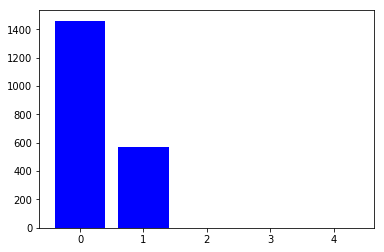

In [193]:
plt.bar(list(new_example.keys()), new_example.values(), color='b')
plt.show()

Это функция g(m) для последовательности PPPPPHHHHH. 
Диаграммы выглядят прям как в статье [1]

In [16]:
def partition_function(sequence,  e, conformations=[]):
    """Cтатистическая функция. Принимает последовательность и значение е<0 - значение энергии 
    взаимодействия между топологическими НН.
    Также принимает список конформаций длины данной цепочки, иначе сгенерирует его сама."""
    if(len(conformations)==0):
        conformations = get_all_conformations(len(sequence))
    degeneracy = get_g_m( sequence, conformations )
    s=max(degeneracy.keys())
    Z = 0 
    for m, g in degeneracy.items():
        Z=Z + g*exp((s-m)*e)
        
    return Z

In [22]:
a =partition_function([0, 0, 0, 0, 0, 0, 1,0,0,1] , -2, conformations_10)
print(a)

574.4459581034023


In [17]:
def mean_compactness(sequence,  e, conformations=[]):
    if(len(conformations)==0):
        conformations = get_all_conformations(len(sequence))
      
    
    n=len(sequence)
    m_1 = ceil(sqrt(n))
    m = floor(sqrt(n))
    if( n>m*m and m*m_1>=n ):
        t_max =n+1 - (4*m+2)/2
    elif (n>m*m_1 and n<=m_1*m_1):
        t_max = n+1 - (4*m+4)/2
    else:
        t_max =  n+1 - (4*m)/2
    
    t_max=int(t_max) 
    
    G_m = get_G_m_u(sequence, conformations)
    s= max(G_m.keys(), key=itemgetter(0) )[0]

    p=0
    for neighbors, g in G_m.items():
        p=p+(neighbors[0] +neighbors[1])/t_max*g * exp(( s - neighbors[0])*e)
    return p/partition_function( sequence,  e, conformations)

In [20]:
w = mean_compactness([0, 0, 0, 0, 0, 0, 1,0,0,1] , -1, conformations_10)
print(w)

0.34318715505185976


In [274]:
es = np.linspace(0, 8, 20)
example_of_sequence1 = [1, 0, 1, 0, 0, 1, 0,0,1,1] 
example_of_sequence2 =  [0, 0, 0, 0, 0, 0, 1,0,0,1] 
meancompactnesses1 = []
meancompactnesses2 = [] 
for i in es: 
    w = mean_compactness(example_of_sequence1, -i, conformations_10)
    meancompactnesses1.append(w)
    w1= mean_compactness(example_of_sequence2, -i, conformations_10)
    meancompactnesses2.append(w1)
print("finish")


finish


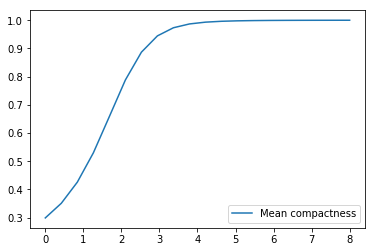

In [275]:
plt.plot(es, meancompactnesses1, '-', label = "Mean compactness")
plt.legend(loc='best')

По оси Х отложены -е. 
Это график зависимости средней компактности от значения энергии для последовательности НРНРРНРРНН. Такая последовательность может свернуться. 

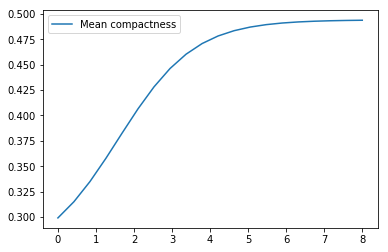

In [276]:
plt.plot(es, meancompactnesses2, '-', label = "Mean compactness")
plt.legend(loc='best')

Это график зависимости средней компактности от значения энергии для последовательности  PPPPPHHHHH. Такая последовательность не свернется. 

# Поиск радиуса вращения

Формулы брала в [3], источник возможно не самый топовый, но не нашла понятного для себя описания в [2]


In [18]:
def center_of_mass(conformation):
    """Функция для нахождения координат центра масс.
    Подразумевается, что все аминокислоты в молекуле одинаковой массы, а между ними ничего с массой нет.
    Принимает конформацию - список из координат, возвращает координаты в виде коортежа.
    """
    x=0
    y=0
    for i in range(len(conformation)):
        x=x+(conformation[i][0]-conformation[0][0])
        y=y+(conformation[i][1]-conformation[0][1])
        
    return (x/len(conformation), y/len(conformation)) 


In [19]:
def square_radius_of_gyration(conformation):
    """Функция возвращает радиус вращения для данной конформации """
    cent_mass=center_of_mass(conformation)
    summa=0
    for i in range(len(conformation)):
        dist = (conformation[i][0]-cent_mass[0],  conformation[i][1]-cent_mass[1])
        summa=summa+dist[0]*dist[0]+dist[1]*dist[1]
    return summa/len(conformation)
    
    

In [15]:
a=654
print(conformations_10[a])

q = center_of_mass(conformations_10[a])
print(q)
sq = square_radius_of_gyration( conformations_10[a]  )
print(sq)

[(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (2, 3), (3, 3), (4, 3), (4, 2), (3, 2)]
(2.3, 1.6)
2.8500000000000005


In [25]:

mean_square_r=0
for conf in conformations_10:
    mean_square_r = mean_square_r+square_radius_of_gyration(conf)

print((mean_square_r/len(conformations_10))**2)


mean_square_r1=0
for conf in saws_set:
    mean_square_r1 = mean_square_r1+square_radius_of_gyration(conf)

print((mean_square_r1/len(saws_set)))

11.051865486822441
3.323223506269924


In [30]:
start_conformation = [(0,0)]

radius_on_length=[]
for i in range(3, 16):
    c=[]
    get_all_saws(c, i,start_conformation)
    mean_square_r1=0
    for conf in c:
        mean_square_r1 = mean_square_r1+square_radius_of_gyration(conf)
    radius_on_length.append(mean_square_r1/len(c))
    
    

[0.5185185185185187, 0.8055555555555556, 1.1551999999999998, 1.5207355242566525, 1.9369963369963359, 2.3641804788213627, 2.8395896459903778, 3.323223506269924, 3.850148235602695, 4.385065784369366, 4.959224386101646, 5.541066479910164, 6.159134442515008]


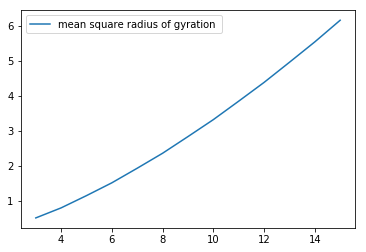

In [37]:
print(radius_on_length)
plt.plot(range(3, 16), radius_on_length, '-', label = "mean square radius of gyration ")
plt.legend(loc='best')

 Зависимость среднего квадрата радиуса вращения (?) 
 (Рассматривался набор со всеми блужданиями без самопересечений ) 

In [20]:
def mean_square_ete_dist(conformations):
    """Среднее квадратов длин вектора от начала до конца для набора конформаций"""
    s=0
    dists = [] 
    for e in conformations:
        #s=s+square_end_to_end_distance(e)
        dists.append(square_end_to_end_distance(e))
    return sum(dists)/len(dists)

In [68]:
start_conformation = [(0,0)]

mean_dist_allsaws=[]
for i in range(3, 16):
    c=[]
    get_all_saws(c, i,start_conformation)
    mean_dist_allsaws.append(mean_square_ete_dist(c))
    
print(mean_dist_allsaws) 

[2.6666666666666665, 4.555555555555555, 7.04, 9.56338028169014, 12.574358974358974, 15.556169429097606, 19.012846517917513, 22.411359724612737, 26.242539682539682, 30.017657034549263, 34.186992970836975, 38.304340328984686, 42.7864375828615]


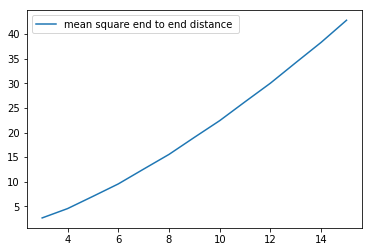

In [66]:
plt.plot(range(3, 16), mean_dist_allsaws, '-', label = "mean square end to end distance ")
plt.legend(loc='best')

In [ ]:
for i in range(3, 11):
    c = get_all_conformations(i)
    number_of_conformations.append(len(c))
    print(i, " finished", end = " ")

# Все блуждания 

In [21]:
def get_all_saws(current_paths, length, current_conformation):
    """ Все созданные конформации лежат в первом аргументе функции get_all_saws, 
    поэтому первым аргументом нужно подавать переменную, которой ранее присвоили пустой список
    
    """
    if(length==1):
        current_paths.append(current_conformation)
    else:
        for step in [(1, 0), (-1, 0), (0, 1),  (0, -1)]:
            new_point = (current_conformation[-1][0]+step[0], current_conformation[-1][1]+step[1] )
            if new_point in current_conformation:
                continue
            else:
                temp_path = current_conformation.copy()
                temp_path.append(new_point)
                get_all_saws(current_paths, length-1,  temp_path)

In [20]:
start_conformation = [(0,0)]
saws_set =[]

get_all_saws(saws_set, 10,start_conformation)
print(len(saws_set))
print(saws_set[10])
print(16268/2034)
#34*8
print(2033*8+4)
print(44100/5513)
print(5512*8+4)

16268
[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (6, 1), (7, 1), (7, 2)]
7.99803343166175
16268
7.999274442227462
44100


# Исследование зависимости от температуры и энергии

In [76]:
sequences_10 =get_sequences(10)
print(len(sequences_10))
print(sequences_10[4] )
w = sequences_10[4].index(1)
print(w)
print(sequences_10[0:20])


1024
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
7
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 1], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 1], [0, 0, 0, 0, 0, 0, 0, 1, 1, 0], [0, 0, 0, 0, 0, 0, 0, 1, 1, 1], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 1], [0, 0, 0, 0, 0, 0, 1, 0, 1, 0], [0, 0, 0, 0, 0, 0, 1, 0, 1, 1], [0, 0, 0, 0, 0, 0, 1, 1, 0, 0], [0, 0, 0, 0, 0, 0, 1, 1, 0, 1], [0, 0, 0, 0, 0, 0, 1, 1, 1, 0], [0, 0, 0, 0, 0, 0, 1, 1, 1, 1], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 1], [0, 0, 0, 0, 0, 1, 0, 0, 1, 0], [0, 0, 0, 0, 0, 1, 0, 0, 1, 1]]


In [82]:
e_value = -3 
mean_compactness_all = []
for i in range(len(sequences_10)):
    mean_compactness_all.append(mean_compactness(sequences_10[i], e_value,conformations_10))
    if(i%100==0):
        print(i, end=" ")

0 100 200 300 400 500 600 700 800 900 1000 

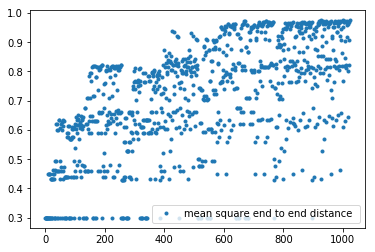

In [84]:
plt.plot(range(0, 1024), mean_compactness_all, '.', label = "mean square end to end distance ")
plt.legend(loc='best')

Это просто средняя компактность для упорядоченного набора всех последовательностей Н и Р 
(в общем, не удавшаяся визуализация) 

In [85]:
Fs = []
for f in sequences_10:
    Fs.append(sum(f)/len(f))
    
print(Fs[1:100])

[0.1, 0.1, 0.2, 0.1, 0.2, 0.2, 0.3, 0.1, 0.2, 0.2, 0.3, 0.2, 0.3, 0.3, 0.4, 0.1, 0.2, 0.2, 0.3, 0.2, 0.3, 0.3, 0.4, 0.2, 0.3, 0.3, 0.4, 0.3, 0.4, 0.4, 0.5, 0.1, 0.2, 0.2, 0.3, 0.2, 0.3, 0.3, 0.4, 0.2, 0.3, 0.3, 0.4, 0.3, 0.4, 0.4, 0.5, 0.2, 0.3, 0.3, 0.4, 0.3, 0.4, 0.4, 0.5, 0.3, 0.4, 0.4, 0.5, 0.4, 0.5, 0.5, 0.6, 0.1, 0.2, 0.2, 0.3, 0.2, 0.3, 0.3, 0.4, 0.2, 0.3, 0.3, 0.4, 0.3, 0.4, 0.4, 0.5, 0.2, 0.3, 0.3, 0.4, 0.3, 0.4, 0.4, 0.5, 0.3, 0.4, 0.4, 0.5, 0.4, 0.5, 0.5, 0.6, 0.2, 0.3, 0.3, 0.4]


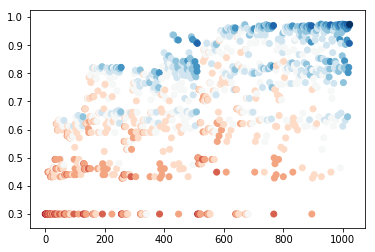

In [90]:
plt.scatter(range(0, 1024), mean_compactness_all, c=Fs, cmap='RdBu')


по горизонтальной оси - номер последовательности из Н и Р в упорядоченном наборе, по вертикальной оси - средняя компактность, чем ближе к синему цвету - тем выше доля Н в последовательности.
Упорядоченный набор - набор последовательностей 0 и 1, начиная от набор из нулей (вся последовательность из Р), заканчивая набором из единиц (вся последовательность из Н)

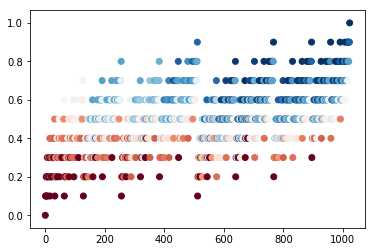

In [91]:
plt.scatter(range(0, 1024), Fs, c=mean_compactness_all, cmap='RdBu')

In [93]:
e_value = -8
mean_compactness_all1 = []
for i in range(len(sequences_10)):
    mean_compactness_all1.append(mean_compactness(sequences_10[i], e_value,conformations_10))
    if(i%100==0):
        print(i, end=" ")

0 100 200 300 400 500 600 700 800 900 1000 

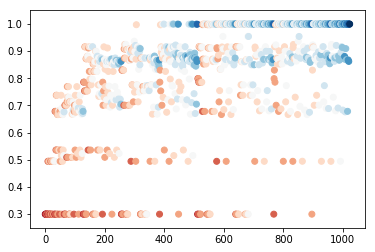

In [94]:
plt.scatter(range(0, 1024), mean_compactness_all1, c=Fs, cmap='RdBu')

То же самое, только для значения энергии -8 

In [22]:
def partition_function2(sequence,  t, conformations=[]):
    """Cтатистическая функция для фиксированной последовательности,
    зависит от температуры (пока что так)"""
    if(len(conformations)==0):
        conformations = get_all_conformations(len(sequence))
    degeneracy = get_g_m( sequence, conformations )
    s=max(degeneracy.keys())
    Z = 0 
    for m, g in degeneracy.items():
        Z=Z + g*exp((s-m)*(-1/t))
        
    return Z

In [23]:
def mean_compactness2(sequence,  t, conformations=[]):
    """Отличается от предыдущей версии вызовом другой стат функции и зависимости от температуры"""
    if(len(conformations)==0):
        conformations = get_all_conformations(len(sequence))
      
    
    n=len(sequence)
    m_1 = ceil(sqrt(n))
    m = floor(sqrt(n))
    if( n>m*m and m*m_1>=n ):
        t_max =n+1 - (4*m+2)/2
    elif (n>m*m_1 and n<=m_1*m_1):
        t_max = n+1 - (4*m+4)/2
    else:
        t_max =  n+1 - (4*m)/2
    
    t_max=int(t_max) 
    
    G_m = get_G_m_u(sequence, conformations)
    s= max(G_m.keys(), key=itemgetter(0) )[0]

    p=0
    for neighbors, g in G_m.items():
        p=p+(neighbors[0] +neighbors[1])/t_max*g * exp(( s - neighbors[0])*(-1/t))
    return p/partition_function2( sequence,  t, conformations)

In [29]:
ts = np.linspace(0.1, 8, 40)
es = np.linspace(0.1, 8, 40)
example_of_sequence1 = [1, 0, 1, 0, 0, 1, 0,0,1,1] 
example_of_sequence2 =  [0, 0, 0, 0, 0, 0, 0,0,0,1] 
meancompactnesses1t = []
meancompactnesses2t = [] 
for t in ts: 
    w = mean_compactness(example_of_sequence1, t, conformations_10)
    meancompactnesses1t.append(w)
    w1= mean_compactness(example_of_sequence2, t, conformations_10)
    meancompactnesses2t.append(w1)
print("finish")


finish


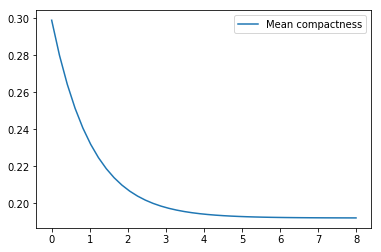

In [105]:
plt.plot(ts, meancompactnesses1t, '-', label = "Mean compactness")
plt.legend(loc='best')

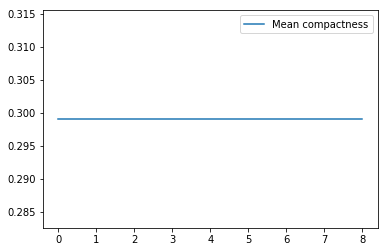

In [106]:
plt.plot(ts, meancompactnesses2t, '-', label = "Mean compactness")
plt.legend(loc='best')

In [30]:
def partition_function3(sequence,  e, t, conformations=[]):
    """Cтатистическая функция для фиксированной последовательности,
    зависит от температуры и энергии взаимодействия """
    if(len(conformations)==0):
        conformations = get_all_conformations(len(sequence))
    degeneracy = get_g_m( sequence, conformations )
    s=max(degeneracy.keys())
    Z = 0 
    for m, g in degeneracy.items():
        Z=Z + g*exp((s-m)*(e/t))
        
    return Z

In [31]:
def mean_compactness3(sequence,e, t, conformations=[]):
    """Отличается от предыдущей версии вызовом другой стат функции и зависимости от температуры"""
    if(len(conformations)==0):
        conformations = get_all_conformations(len(sequence))
      
    
    n=len(sequence)
    m_1 = ceil(sqrt(n))
    m = floor(sqrt(n))
    if( n>m*m and m*m_1>=n ):
        t_max =n+1 - (4*m+2)/2
    elif (n>m*m_1 and n<=m_1*m_1):
        t_max = n+1 - (4*m+4)/2
    else:
        t_max =  n+1 - (4*m)/2
    
    t_max=int(t_max) 
    
    G_m = get_G_m_u(sequence, conformations)
    s= max(G_m.keys(), key=itemgetter(0) )[0]

    p=0
    for neighbors, g in G_m.items():
        p=p+(neighbors[0] +neighbors[1])/t_max*g * exp(( s - neighbors[0])*(e/t))
    return p/partition_function3( sequence,e,  t, conformations)

In [32]:
mean_comp_e_t = [] 
example_of_sequence1 = [1, 0, 1, 0, 0, 1, 0,0,1,1] 
for e in range(len(es)):
    mean_comp_e_t.append([])
    for t in ts:
        mean_comp_e_t[e].append(mean_compactness3(example_of_sequence1, -es[e], t, conformations_10))
        
    print(e, end =" ")
        

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 

In [33]:
e_for_plot = []
t_for_plot = [] 
mean_for_plot = [] 
for e in range(len(es)):
    for t in range(len(ts)):
        e_for_plot.append(es[e])
        t_for_plot.append(ts[t])
        mean_for_plot.append(mean_comp_e_t[e][t])

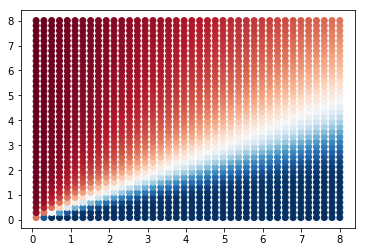

In [34]:
plt.scatter(e_for_plot, t_for_plot, c=mean_for_plot, cmap='RdBu')

По горизонтали - модуль взаимодействия, по оси у - температура, цвет зависит от средней компактности. 
Рассматривалась последовательность НРНРРНРРНН.

In [36]:
mean_comp_e_t1 = [] 
example_of_sequence2 =  [0, 0, 0, 0, 0, 1, 1,1,1,1] 
for e in range(len(es)):
    mean_comp_e_t1.append([])
    for t in ts:
        mean_comp_e_t1[e].append(mean_compactness3(example_of_sequence2, -es[e], t, conformations_10))
        
    print(e, end =" ")

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 

In [57]:
mean_for_plot1=[]
for e in range(len(es)):
    for t in range(len(ts)):
        mean_for_plot1.append(mean_comp_e_t1[e][t])

 https://matplotlib.org/examples/pylab_examples/multi_image.html

In [59]:
class ImageFollower(object):
    'update image in response to changes in clim or cmap on another image'

    def __init__(self, follower):
        self.follower = follower

    def __call__(self, leader):
        self.follower.set_cmap(leader.get_cmap())
        self.follower.set_clim(leader.get_clim())

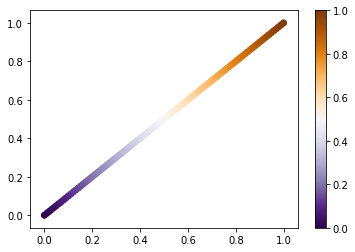

In [60]:
somex = np.linspace(0,1,100)
somey=np.linspace(0,1,100)

im=plt.scatter(somex, somey, c=somex, cmap="PuOr_r")

plt.colorbar(im)

1.0
0.4943280977312391


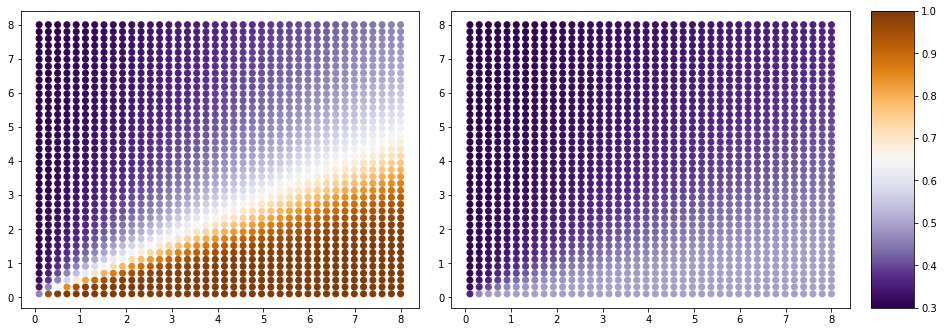

In [61]:
fig, axes = plt.subplots(1, 2, figsize=(13, 4.5), constrained_layout=True)
images = []
#plt.subplot(211)
#plt.scatter(e_for_plot, t_for_plot, c=mean_for_plot, cmap='RdBu')


#im0= axes[0].scatter(e_for_plot, t_for_plot, c=mean_for_plot,  cmap="PuOr_r")


vmin = 1e40
vmax = -1e40
#fig.colorbar(im, ax=ax[0])

#plt.subplot(212)
#plt.scatter(e_for_plot, t_for_plot, c=mean_for_plot1, cmap='RdBu')


#im1= axes[1].scatter(e_for_plot, t_for_plot, c=mean_for_plot1, cmap="PuOr_r")

#fig.subplots_adjust(right=0.8)
#cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
#fig.colorbar(im1, cax=cbar_ax)

#fig.colorbar(im1, ax=ax[1])
#ax.show()
print(mean_for_plot[1560])
print(mean_for_plot1[1560])
#fig.colorbar(im)
#cmap = 'plasma'
#ncontours = 5
#norm_top = matplotlib.colors.Normalize(vmin=0, vmax=1)
q=[mean_for_plot, mean_for_plot1]
k=0
for i in q:
    dd = ravel(i)
    vmin = min(vmin, amin(dd))
    vmax = max(vmax, amax(dd))
    a= axes[k].scatter(e_for_plot, t_for_plot, c=i,  cmap="PuOr_r")
    images.append(a)
    k=k+1
    #images.append(a.imshow(data, cmap=cmap))
    


norm = colors.Normalize(vmin=vmin, vmax=vmax)
for i, im in enumerate(images):
    im.set_norm(norm)
    if i > 0:
        images[0].callbacksSM.connect('changed', ImageFollower(im))

# The colorbar is also based on this master image.
#fig.colorbar(images[0], cax, orientation='horizontal')
fig.colorbar(images[0], orientation='vertical')
     # Return the current axes to the first one,
#plt.sci(images[0])  # because the current image must be in current axes.

plt.show()

#cmap = cm.get_cmap(cmap, ncontours) # number of colors on colorbar
#mtop = cm.ScalarMappable(cmap=cmap, norm=norm_top)

#cbar_top = fig.colorbar(mtop, ax=ax_top, orientation='vertical', shrink=0.75, pad=0.2) #, cax=cax_top)
#cbar_top.set_ticks(np.linspace(min(zz_top), max(zz_top), ncontours))
#cax,kw = mpl.colorbar.make_axes([ax for ax in axes.flat])
#plt.colorbar(im1, cax=cax, **kw)

#plt.colorbar(im, cax=axins, ticks=[1, 2, 3])

In [ ]:
mean_comp_e_t2= [] 
example_of_sequence2 =  [0, 0, 0, 0, 0, 0, 0,0,0,1] 
for e in range(len(es)):
    mean_comp_e_t2.append([])
    for t in ts:
        mean_comp_e_t2[e].append(mean_compactness3(example_of_sequence2, -es[e], t, conformations_10))
        
    print(e, end =" ")

In [87]:
mean_for_plot2=[]
for e in range(len(es)):
    for t in range(len(ts)):
        mean_for_plot2.append(mean_comp_e_t2[e][t])

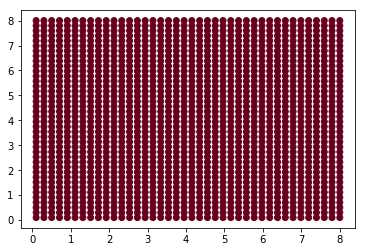

In [88]:
plt.scatter(e_for_plot, t_for_plot, c=mean_for_plot2, cmap='RdBu')

Это для последовательности PPPPPPPPPH, что выглядит правдоподобно 

# Средняя энергия и теплоемкость 

In [51]:
def mean_energy(sequence,e, t, conformations=[]):
    """ Средняя энергия.
    Принимает последовательность и значение е<0 - значение энергии и температуру.
    взаимодействия между топологическими НН.
    Также принимает список конформаций длины данной цепочки, иначе сгенерирует его сама."""
    
    n=len(sequence)
    m_1 = ceil(sqrt(n))
    m = floor(sqrt(n))
    if( n>m*m and m*m_1>=n ):
        t_max =n+1 - (4*m+2)/2
    elif (n>m*m_1 and n<=m_1*m_1):
        t_max = n+1 - (4*m+4)/2
    else:
        t_max =  n+1 - (4*m)/2
    
    t_max=int(t_max) 
    
    g=get_g_m(sequence, conformations)
    
    s= max(g.keys())
    
    energy=0
    for key, value in g.items():
        energy=energy+key*value*exp((s-key)*(e/t))
        
        
    return energy/partition_function3(sequence, e, t,conformations)
    

In [53]:
es = np.linspace(0, 8, 20)
example_of_sequence1 = [1, 0, 1, 0, 0, 1, 0,0,1,1] 
example_of_sequence2 =  [0, 0, 0, 0, 0, 1, 1,1,1,1] 
meanenergy1 = []
meanenergy2 = [] 
for i in es: 
    w = mean_energy(example_of_sequence1, -i,1, conformations_10)
    meanenergy1.append(w)
    w1= mean_energy(example_of_sequence2, -i,1, conformations_10)
    meanenergy2.append(w1)
print("finish")


finish


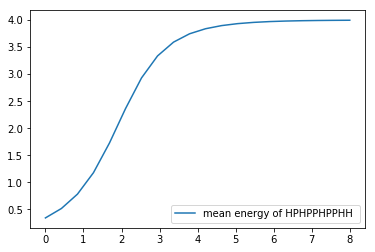

In [49]:
plt.plot(np.linspace(0, 8, 20), meanenergy1 , '-', label = "mean energy of HPHPPHPPHH ")
plt.legend(loc='best')

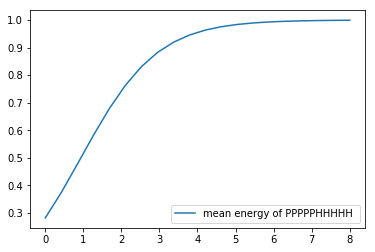

In [50]:
plt.plot(np.linspace(0, 8, 20), meanenergy2 , '-', label = "mean energy of PPPPPHHHHH ")
plt.legend(loc='best')

In [54]:
ts = np.linspace(0.1, 8, 40)
es = np.linspace(0.1, 8, 40)
example_of_sequence1 = [1, 0, 1, 0, 0, 1, 0,0,1,1] 
example_of_sequence2 =  [0, 0, 0, 0, 0, 0, 0,0,0,1] 
meanenergy1 = []
meanenergy2 = [] 

for e in range(len(es)):
    meanenergy1.append([])
    meanenergy2.append([])
    for t in ts:
        meanenergy1[e].append(mean_energy(example_of_sequence1, -es[e], t, conformations_10))
        meanenergy2[e].append(mean_energy(example_of_sequence2, -es[e], t, conformations_10))
        
    print(e, end =" ")

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 

In [62]:
e_for_plot = []
t_for_plot = [] 
mean_e_for_plot1 = [] 
mean_e_for_plot2 = [] 
for e in range(len(es)):
    for t in range(len(ts)):
        e_for_plot.append(es[e])
        t_for_plot.append(ts[t])
        mean_e_for_plot1.append(meanenergy1[e][t])
        mean_e_for_plot2.append(meanenergy2[e][t])

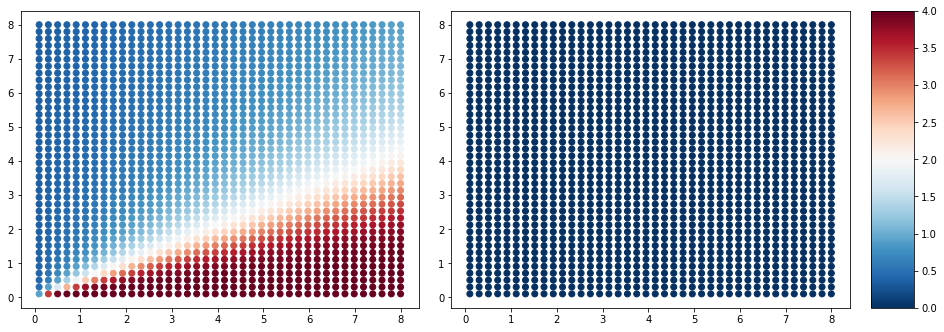

In [64]:
fig, axes = plt.subplots(1, 2, figsize=(13, 4.5), constrained_layout=True)
images = []

vmin = 1e40
vmax = -1e40

q=[mean_e_for_plot1, mean_e_for_plot2]
k=0
for i in q:
    dd = ravel(i)
    vmin = min(vmin, amin(dd))
    vmax = max(vmax, amax(dd))
    a= axes[k].scatter(e_for_plot, t_for_plot, c=i,  cmap="RdBu_r")
    images.append(a)
    k=k+1
 
    


norm = colors.Normalize(vmin=vmin, vmax=vmax)
for i, im in enumerate(images):
    im.set_norm(norm)
    if i > 0:
        images[0].callbacksSM.connect('changed', ImageFollower(im))

# The colorbar is also based on this master image.
#fig.colorbar(images[0], cax, orientation='horizontal')
fig.colorbar(images[0], orientation='vertical')
     # Return the current axes to the first one,
#plt.sci(images[0])  # because the current image must be in current axes.

plt.show()


# References

1) A Lattice Statistical Mechanics Model of the Conformational and Sequence Spaces of Proteins, Kit Fun Lau and Ken A. Dill, Macromolecules 1989 

2) Lattice Models of Polymers, Carlo Vanderzande, 2008

3) Polymer solutions, An Introduction to Physical Properties, IWAO TERAOKA